In [1]:
pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

In [3]:
from google.colab import files
uploaded = files.upload ()

Saving Churn_Modelling_Dataset.csv to Churn_Modelling_Dataset.csv


In [4]:
churn_rate_analysis = pd.read_csv('Churn_Modelling_Dataset.csv')

In [5]:
churn_rate_analysis.info()
churn_rate_analysis.isnull().sum()
churn_rate_analysis.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Churn            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


np.int64(0)

In [6]:
churn_rate_analysis.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:00<00:00, 26.55it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
churn_rate_analysis['Churn'].mean() * 100
#shows the percentage of customers who churn

np.float64(20.369999999999997)

In [21]:
churn_counts

Churn
0    7963
1    2037
Name: count, dtype: int64

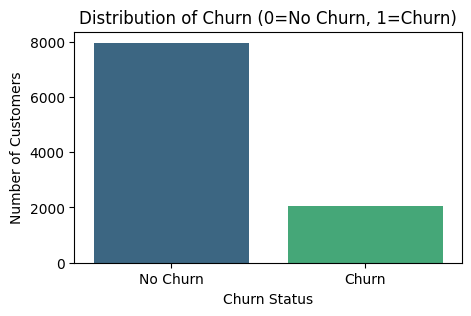

<Figure size 640x480 with 0 Axes>

In [18]:
# Calculate the counts of churned and non-churned customers
churn_counts = churn_rate_analysis['Churn'].value_counts()

# Create the bar chart
plt.figure(figsize=(5, 3))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='viridis', hue=churn_counts.index, legend=False)
plt.title('Distribution of Churn (0=No Churn, 1=Churn)')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])
plt.show()


# Save the chart
plt.savefig('churn_distribution_bar_chart.png')
plt.show()

In [15]:
#checking for correlection across all parameters with respect to the churn value
churn_corr = [
    'Churn','CreditScore','Age','Tenure','Balance',
    'NumOfProducts','IsActiveMember','EstimatedSalary'
]
corr_analysis = churn_rate_analysis[churn_corr].corr()

churn_corr_analysis = corr_analysis['Churn'].drop('Churn').abs().sort_values(ascending=False)

print(churn_corr)


corr_analysis['Churn'].drop('Churn').loc[churn_corr_analysis.index]

['Churn', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary']


Age                0.285323
IsActiveMember    -0.156128
Balance            0.118533
NumOfProducts     -0.047820
CreditScore       -0.027094
Tenure            -0.014001
EstimatedSalary    0.012097
Name: Churn, dtype: float64

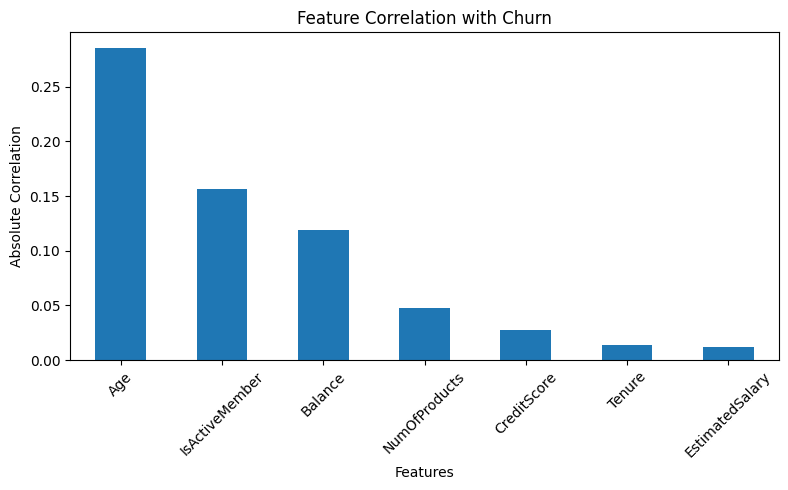

<Figure size 640x480 with 0 Axes>

In [19]:
churn_corr_analysis.plot(
    kind='bar',
    figsize=(8,5),
    title='Feature Correlation with Churn'
)

plt.ylabel('Absolute Correlation')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Save the chart
plt.savefig('Feature_Correlation_with_Churn.png')

plt.show()

This shows the top 3 factors are Age, Not active members and Balance

In [39]:
#Building a model that determines if a customer will churn on registration
features = [ "Age", "IsActiveMember","Balance", "NumOfProducts", "CreditScore", "Tenure", "EstimatedSalary"]
target = "Churn"
#x takes the parameters for a customer to churn and y is the predictive parameter the model uses
X = churn_rate_analysis[features]
y = churn_rate_analysis['Churn']

In [40]:
from sklearn.model_selection import train_test_split
#ensures the training and test cycles works well

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=8
)

In [43]:
#this trains the model and take all values
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=700)
model.fit(X_train, y_train)


LogisticRegression(max_iter=700)

In [44]:
#this help the model predict the chrun rate of every new customers
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8055
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1587
           1       0.61      0.16      0.25       413

    accuracy                           0.81      2000
   macro avg       0.71      0.57      0.57      2000
weighted avg       0.77      0.81      0.76      2000



In [45]:
#possible_churn_rate represent learnt pattern from previous factors common to
#churn_rate_analysis
possible_churn_rate = pd.Series(
    model.coef_[0],
    index=features
).sort_values()

print(possible_churn_rate)

IsActiveMember    -1.028686e+00
NumOfProducts     -4.591787e-02
Tenure            -1.266053e-02
CreditScore       -5.741164e-04
EstimatedSalary    1.590868e-07
Balance            4.833361e-06
Age                7.106428e-02
dtype: float64


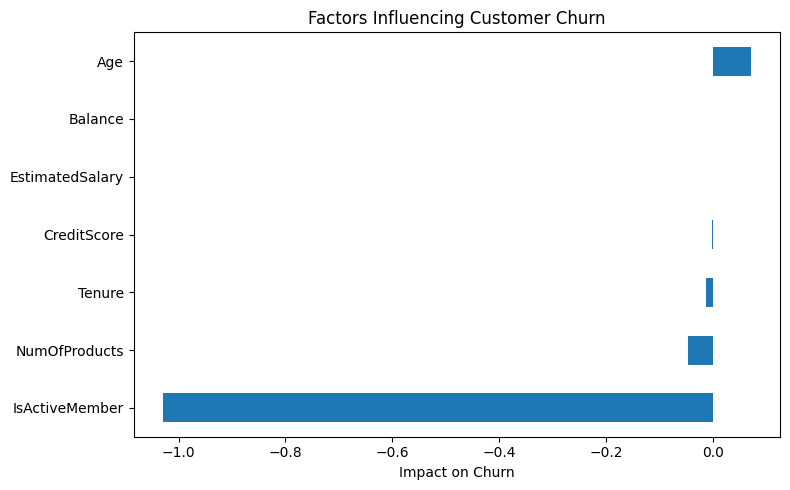

In [46]:
#visual representation of the prediction
possible_churn_rate.plot(
    kind='barh',
    figsize=(8,5),
    title='Factors Influencing Customer Churn'
)
plt.xlabel('Impact on Churn')
plt.tight_layout()
plt.show()